# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 3: Regression Modeling and Bacteria Growing

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [604]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Import Libraries

In [605]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import warnings

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">


<div class="theme"> Overview and Data Description</div> 

### Predicting percentage change in multiple bacteria populations given their spreading factor.


In this homework, we will mainly explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



 ### Problem Description
Given the bacteria data, we will predict the percentage change in population, giving the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will fit a polynomial regression model for a specified degree that computes the respective degree predictors to fit a model on the training set, which will be evaluated on the test set. The performance of the models should be evaluated using their $MSE$.



<div class='exercise'><b> Question 1:   Data Visualization [10 points total]</b>
    
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 

**1.2** [4 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Your Answers

<div class='exercise-r'>  
 
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv`
 file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title.
 
 </div>

In [606]:
# your code here
filename = "data/bacteria_train.csv"

df = pd.read_csv(filename)

df.head()

perp = df['Perc_population']
spread = df['Spreading_factor']

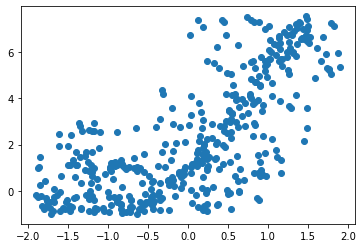

In [607]:
# your code here
fig, ax = plt.subplots()
ax.plot(spread,perp,'o')

<div class='exercise-r'>  
 
**1.2** [4 pts] Based on the graph, is there any discernable relationship between
 the spreading factor and percentage change in population?
 
 </div>

*Your answer here*
Yes, there appears to a roughly liner trend line. 

<hr style='height:2px'> 

### Your HW3 Roadmap

We will be following this roadmap for the rest of the homework.

![](soln-roadmap.png)


<div class='exercise'><b> Question 2:   Model Building: Guesstimate the polynomial relationship [10 points total]</b>

**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
- Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
- Fit a polynomial regression on the training set.
- Compute and print the mean_squared_error on the test set.
- Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
- Explain your guesstimation of the degree.

**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
- Display the coefficient values of the model fit above.
- For each bootstrap store the coefficients of the model as a list
- Using the bootstrap list compute the 2.5 and 97.5 confidence points.
- Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.

**Hints**
- Bootstrap for entire fraction (100%) of the training data.
- Limit the number of bootstraps to 100.
    
    
</div>


### Answers

<div class='exercise-r'>  
 
**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
 - Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
 - Fit a polynomial regression on the training set.
 - Compute and print the mean_squared_error on the test set.
 - Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
 - Explain your guesstimation of the degree.
 
 </div>

In [608]:
# Make a global dictionary to save the MSE values
# your code here
best_mse_dict = {}


In [609]:
# read the data 
# your code here 
filename = "data/bacteria_train.csv"
df_train = pd.read_csv(filename)

filename = "data/bacteria_test.csv"
df_test = pd.read_csv(filename)


df_train['Spread_2'] = df_train['Spreading_factor']**2

df_train.head()

,Perc_population,Spreading_factor,Spread_2
0,1.535,0.190708,0.036370
1,5.555,0.326928,0.106882
2,-0.277,-0.459699,0.211323
3,1.724,-0.193013,0.037254
4,-0.550,-0.835745,0.698470


In [610]:
 # Guesstimate degree of the curve
# your code here 
d = 3
x_train = df_train['Spreading_factor'].values
x_test = df_test['Spreading_factor'].values

x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train.reshape(-1,1))
x_poly_test = PolynomialFeatures(degree=d).fit_transform(x_test.reshape(-1,1))

model_poly = LinearRegression(fit_intercept = False).fit(x_poly_train, df_train['Perc_population'])

y_pred = model_poly.predict(x_poly_test)



In [611]:
# Compute the mean_squared_error on the test set and name it mse 
# Add it to best_mse_dict
# your code here 

y_test = df_test['Perc_population'].values

y_poly_test = PolynomialFeatures(degree=d).fit_transform(y_test.reshape(-1,1))

MSE = mean_squared_error(y_pred, y_test)

display(MSE)

best_mse_dict['2.1'] = MSE

best_mse_dict

2.6519056545149615

{'2.1': 2.6519056545149615}

# your code here 
The shape is not super complex, but it looks like it should curve to an extent. I think adding many more degrees will give diminishing returns and added complexity

<div class='exercise-r'>  
 
**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
 - Display the coefficient values of the model fit above.
 - For each bootstrap store the coefficients of the model as a list
 - Using the bootstrap list compute the 2.5 and 97.5 confidence points.
 - Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.
 
 **Hints**
 - Bootstrap for entire fraction (100%) of the training data.
 - Limit the number of bootstraps to 100.
 
 
 </div>

In [612]:
# your code here
print("Coefficients:")
for i in range(d+1):
    print("Beta"+str(i),":",model_poly.coef_[i])

Coefficients:
Beta0 : 1.5449914507699216
Beta1 : 2.1233800922886013
Beta2 : 0.6942221423624271
Beta3 : -0.09858653285195634


In [613]:
# your code here
bootstrap = []
numboot = 100

for i in range(numboot):
    #sample in random order
    df_sample = df_train.sample(frac=1, replace = True)
    
    #Add polynomial features 
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(df_sample[['Spreading_factor']].values.reshape(-1,1))
    
    #fit a multi-degree linear regression line
    model_poly = LinearRegression(fit_intercept=False).fit(x_poly_train, df_sample['Perc_population'])

    #append to bootstrap
    bootstrap.append(model_poly.coef_)

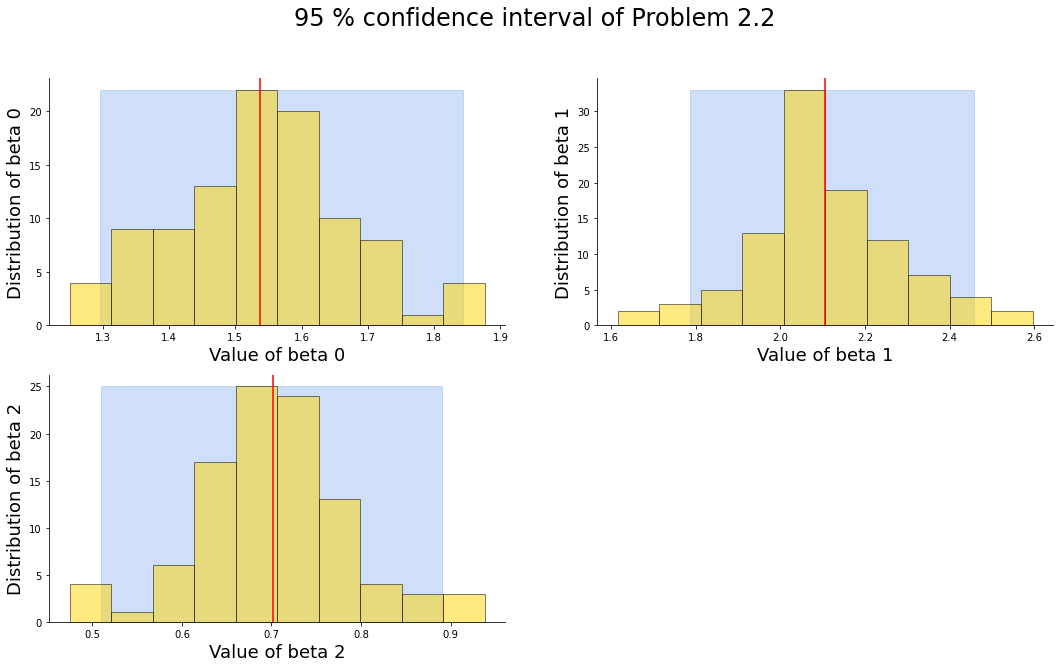

In [614]:
# your code here 
bootstrap = np.array(bootstrap)

fig, ax = plt.subplots(2,2, figsize = (18,10))
ax = ax.ravel()
for i in range(3):
    betavals = bootstrap[:,i]
    betavals.sort()
    x1 = np.percentile(betavals,2.5)
    x2 = np.percentile(betavals,97.5)
    x = np.linspace(x1,x2,500)
    counts, bins = np.histogram(betavals)
    y = counts.max()
    ax[i].hist(bootstrap[:,i], bins = 10, color="gold",alpha=0.5,edgecolor='black', linewidth=1)
    ax[i].fill_between(x,y, color = 'cornflowerblue',alpha=0.3)
    ax[i].set_ylabel(f'Distribution of beta {i}',fontsize=18)
    ax[i].set_xlabel(f'Value of beta {i}',fontsize=18)
    ax[i].axvline(x = np.mean(betavals), color='r')

fig.delaxes(ax[3])
fig.suptitle(f'95 % confidence interval of Problem 2.2', fontsize = 24)
sns.despine()

<div class='exercise'><b> Question 3:   Use a validation set to find the most promising polynomial relationship [12 points total]</b>

**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
- Compare degrees up to 30
- For each degree of the polynomial
     - Fit a polynomial regression on the training set.
     - Calculate the mean_squared_error ($MSE$) on the *validation set*.
    
- Compare the values of the validation set, and select the degree for which the validation error is the least.

**Hints**
- Manually implement the validation - do not use `sklearn` for this question.

**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set). 
Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.


**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.

</div>  
                                                                                                                                 

### Your Answers

<div class='exercise-r'>  
 
**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
 - Compare degrees up to 30
 - For each degree of the polynomial
 - Fit a polynomial regression on the training set.
 - Calculate the mean_squared_error ($MSE$) on the *validation set*.
 
 - Compare the values of the validation set, and select the degree for which the validation error is the least.
 
 **Hints**
 - Manually implement the validation - do not use `sklearn` for this question.
 
 </div>

In [615]:
# your code here
MSE_val = []
MSE_train = []

In [616]:
# split the train data into train and validation sets 
# with 80% of the data as the train data and random_state=44
# your code here
df_train, df_val = train_test_split(df_train, train_size = 0.8, random_state=44)


In [617]:
# your code here
for i in range(30):
    d = i
    
    x_train = df_train['Spreading_factor'].values
    x_val = df_val['Spreading_factor'].values
    y_val = df_val['Perc_population']
    y_train = df_train['Perc_population']
    
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train.reshape(-1,1))
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_val.reshape(-1,1))
  
    model_poly = LinearRegression(fit_intercept = False).fit(x_poly_train, y_train)

    y_pred_train = model_poly.predict(x_poly_train)
    y_pred_val = model_poly.predict(x_poly_val)
    
    MSE_train.append(mean_squared_error(y_pred_train,y_train))
    MSE_val.append(mean_squared_error(y_pred_val,y_val))
    
    

    

In [618]:
# your code here


In [619]:
# Print the train and validation MSE along with the degree of the best model. 
# To do this find the degree that gives the lowest MSE.
# your code here min_
min_train_index = MSE_train.index(min(MSE_train))
MSE_train_min = MSE_train[min_train_index]

print(f"Minimum MSE for train index:{MSE_train_min}. This occurs at degree:{min_train_index+1}")

min_val_index = MSE_val.index(min(MSE_val))
MSE_val_min = MSE_val[min_val_index]

print(f"Minimum MSE for val index:{MSE_val_min}. This occurs at degree:{min_val_index+1}")

Minimum MSE for train index:2.4029325092528415. This occurs at degree:30
Minimum MSE for val index:2.7642741851813257. This occurs at degree:16


<div class='exercise-r'>  
 
**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set).
 Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.
 
 
 </div>

In [620]:
# your code here
d = 16
    
x_train = df['Spreading_factor'].values
y_train = df['Perc_population']
    
x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train.reshape(-1,1))

model_poly = LinearRegression(fit_intercept = False).fit(x_poly_train, y_train)

y_pred_train = model_poly.predict(x_poly_train)
    
best_mse_dict["3.2"] = mean_squared_error(y_pred_train,y_train)



In [621]:
# your code here


<div class='exercise-r'>  
 
**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.
 
 
 </div>

In [622]:
spread = df['Spreading_factor']

test_df = pd.DataFrame()

test_df["x_test_values"] = spread.values
test_df["y_test_values"] = y_pred_train

test_df_sort = test_df.sort_values(by='x_test_values')

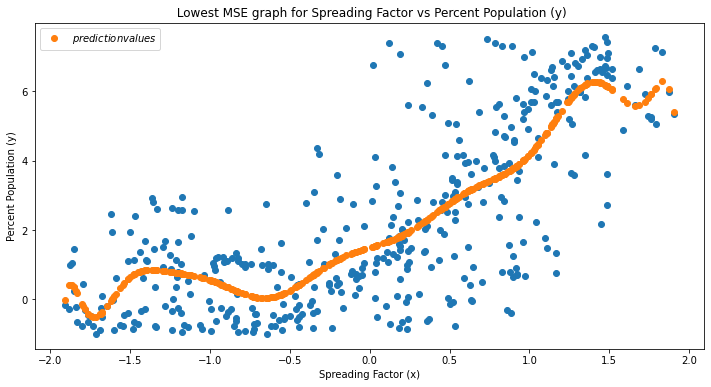

In [623]:
# your code here
perp = df['Perc_population']

x_train_sort = df.sort_values(['Spreading_factor'])
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(spread,perp,'o')

ax.plot(test_df_sort['x_test_values'], test_df_sort['y_test_values'], 'o', label=r'$prediction values$')
ax.set_title(' Lowest MSE graph for Spreading Factor vs Percent Population (y)')
ax.set_xlabel('Spreading Factor (x)')
ax.set_ylabel('Percent Population (y)')
ax.legend();

*Your answer here*
the model seems highly fitted. It is clearly a higher degree fit due to the number of curves. This looks to be fairly representative. 

<div class='exercise'><b> Question 4:   Finding the best model by k-fold cross-validation [15 points total]</b>

**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Compute polynomial features up to degree 30. 
- For each degree in this range perform the following:
    - Compute the polynomial features for the data.
    - Perform k-fold cross validation with k=10
    - Compute the polynomial features for the data.
    - Compute the $MSE$ of the train and validation data and store in separate lists. 
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.


#### Hints
* Use sklearn `cross_validate()` to perform cross validation.

**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
- Print the coefficients of the model.

**Hints**
* Sort the $x$ values before making your plots.

**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Compute polynomial features up to degree 30.
 - For each degree in this range perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.
 
 
 #### Hints
 * Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [625]:
# your code here

filename = "data/bacteria_train.csv"
df_train = pd.read_csv(filename)

filename = "data/bacteria_test.csv"
df_test = pd.read_csv(filename)

x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']
x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']

#assign predict and response 
x_train_split, x_val = train_test_split(x_train, train_size = .8, random_state = 44)
y_train_split, y_val = train_test_split(y_train, train_size = .8, random_state = 44)


In [626]:
# your code here
import statistics as st

lreg = LinearRegression()
mse_train = []
mse_test = []
        
def best_degree(x_train_split, y_train_split, degrees):
   
    for d in range(0,degrees):
        #create mse train and test lists 
    

        #compute polynomial features for the data
        x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train_split)
        x_poly_val  = PolynomialFeatures(degree=d).fit_transform(x_val)
               
        #kfolds cross validation 
        cross_val = cross_validate(lreg, x_poly_train, y_train_split, scoring='neg_mean_squared_error', cv = 10, return_train_score = True)
        
        #get the MSE average and add to our lists
       
        mse_train.append(abs(st.mean(cross_val['train_score'])))
        mse_test.append(abs(st.mean(cross_val['train_score'])))

    return mse_train, mse_test

In [627]:
# your code here
mse_train = []
mse_test = []

mse_train, mse_test  = best_degree(x_train_split, y_train_split, 30)

print(mse_train)

[6.460558430595313, 3.0503094788397442, 2.608504320637253, 2.605410860627301, 2.4894740552816303, 2.4888167976567335, 2.475898578395232, 2.4670166103769127, 2.447585538247003, 2.446819901300334, 2.445796320509796, 2.444516614243786, 2.4433127009280597, 2.437635295128376, 2.4319718751351074, 2.4305518920383467, 2.428211226818908, 2.4271754890388273, 2.4256441979750742, 2.4239439319438225, 2.417849105645133, 2.4164134672913877, 2.415600307028909, 2.412315000379307, 2.407406914511635, 3.1898078267186003, 2.411580693381742, 2.4072456021971345, 2.9951419196796962, 3.3195325345320947]


In [628]:
mse_train = []
mse_test = []

mse_val_train, mse_val_test  = best_degree(x_val, y_val, 30)
print(mse_val_train)

[6.010733129570807, 3.2506264467517947, 2.840723400019301, 2.77523442949252, 2.765305902686271, 2.760173440359323, 2.7456658315654963, 2.6704212742616256, 2.582462603855856, 2.5625218523384996, 2.5148301049862787, 2.497823849708598, 2.48641996190063, 2.3989472751029215, 2.3285433116741667, 2.295303117640345, 2.269174731697835, 2.2593761354345134, 2.2499624369537132, 2.2321217445350494, 2.190535055645557, 2.157045321748292, 2.115020410782313, 2.0575797690353035, 2.0003516325365083, 4.323127202274615, 3.0804040556963947, 2.522889961719669, 2.7974897814976707, 3.8866477306860565]


In [629]:
from pandas import DataFrame

mse_train_df = DataFrame(mse_train)
mse_test_df = DataFrame(mse_test)
mse_val_train_df = DataFrame(mse_val_train)
mse_val_test_df = DataFrame(mse_val_test)

print(mse_train_df.idxmin())
print(mse_test_df.idxmin())
print(mse_val_train_df.idxmin())
print(mse_val_test_df.idxmin())

0    24
dtype: int64
0    24
dtype: int64
0    24
dtype: int64
0    24
dtype: int64


<div class='exercise-r'>  
 
**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
 - Print the coefficients of the model.
 
 **Hints**
 * Sort the $x$ values before making your plots.
 
 </div>

In [630]:
#Compute the polynomial features
# your code here
d = 24
x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree=d).fit_transform(x_test)

model_poly = LinearRegression(fit_intercept = False).fit(x_poly_train, y_train)

y_pred_train = model_poly.predict(x_poly_train)

y_pred_test = model_poly.predict(x_poly_test)

print(mean_squared_error(y_pred_train,y_train))

print(mean_squared_error(y_pred_test,y_test))

best_mse_dict["4.2"] = mean_squared_error(y_pred_test,y_test)


2.4797814368807294
2.699129073060968


In [631]:
# your code here
# your code here
print("Coefficients:")
model_poly.coef_

Coefficients:


array([ 1.53378099e+00,  1.18583688e+00, -2.20651375e+00,  7.81947478e+00,
        3.10334797e+01,  2.18393883e+01, -1.84672427e+02, -2.18938141e+02,
        5.77649596e+02,  5.58067054e+02, -1.03346214e+03, -7.33145000e+02,
        1.13975620e+03,  5.77707424e+02, -8.09192326e+02, -2.88317737e+02,
        3.76563195e+02,  9.19773615e+01, -1.14150896e+02, -1.81950881e+01,
        2.17040327e+01,  2.03444026e+00, -2.34966182e+00, -9.83153863e-02,
        1.10478071e-01])

In [632]:
# your code here
y_pred_train

array([ 1.77070602,  2.16534535,  0.32054266,  1.19717201,  0.39590141,
        6.16296854,  5.67244855,  1.87805187,  1.86819652,  1.14111493,
        3.67988291,  6.27928507,  3.39705656,  1.07524449,  3.37160311,
        1.48571   , -0.34304271,  4.06570842,  0.27038321,  6.08740557,
        3.27343897,  1.44062392,  0.94309272,  0.40598313,  1.9419766 ,
        6.14709939,  1.17426648,  0.80583192,  1.73664457,  6.22722674,
        2.74397179,  0.46827959,  1.77070602,  0.08075373,  1.39646676,
       -0.03086553,  0.3155403 ,  0.63351249,  2.953623  ,  3.7402837 ,
        0.04154946,  1.09980128,  3.77968822,  1.75310404,  2.06638307,
        3.46478046,  3.57628104,  0.43617611,  0.21720422,  1.7182883 ,
        5.80039342,  4.1974144 ,  0.75244577,  5.9300909 ,  6.19148641,
        4.78106493,  0.45951749,  3.07812099,  1.6252741 ,  0.75244577,
        6.14709939,  2.28758663,  1.90368527,  0.72502461,  0.91476446,
        0.80583192,  0.43975932, -0.70000129,  6.4577372 ,  5.19

<div class='exercise-r'>  
 
**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
 
 </div>

In [633]:
test_df = pd.DataFrame()

test_df["x_test_values"] =  x_test['Spreading_factor'].values
test_df["y_test_values"] = y_pred_test
#test_df['x_test_values'] = x_test
#test_df['y_test_values'] = y_pred_train

test_df_sort = test_df.sort_values(by='x_test_values')

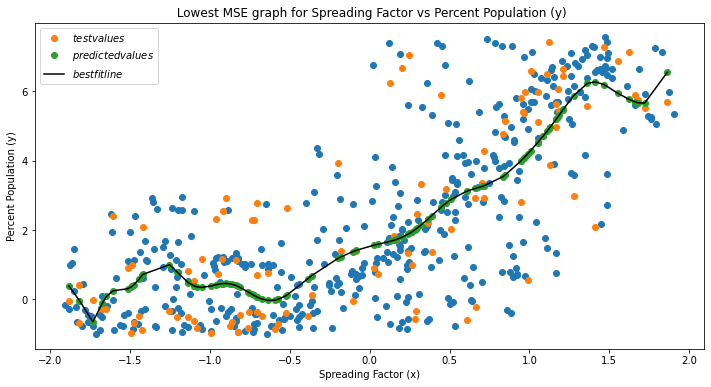

In [634]:
# your code here
perp = df['Perc_population']
spread = df['Spreading_factor']


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(spread,perp,'o')
#sort_spread = spread.sort()
ax.plot(x_test , y_test, 'o', label=r'$test values$')
ax.plot(x_test , y_pred_test, 'o', label=r'$predicted values$')
ax.plot(test_df_sort['x_test_values'] , test_df_sort['y_test_values'], 'k-', label=r'$best fit line$')

ax.set_title(' Lowest MSE graph for Spreading Factor vs Percent Population (y)')
ax.set_xlabel('Spreading Factor (x)')
ax.set_ylabel('Percent Population (y)')
ax.legend();

the model looks highly fitted. There is a clear similatrity to the previous model. 

<div class='exercise'><b> Question 5:   Finding the most <b>consistent</b> model; use k-fold cross validation along with bootstraps [13 points total]</b>

**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Select the max degree for computing the polynomial features and number of bootstraps.
- Create bootstraps of the data. For each bootstrap perform the following:
    - For each degree in the range of max degree perform the following:
        - Compute the polynomial features for the data.
        - Perform k-fold cross validation with k=10
        - Compute the polynomial features for the data.
        - Compute the $MSE$ of the train and validation data and store in separate lists. 
    - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
    - Store the best degree in a list
- Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
- The degree voted best the most times can be selected as the best degree
- Retrain on the entire test set and report the $MSE$ on the test set.

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

**5.2** [3 pts] What are your observations? 

- Why do you see so much variance in the `best_degree` over the bootstraps?
- What will you choose as your `best_degree` for the test set? 

**5.3** [5 pts] Fitting the best model on the test data.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Print the MSE of the model on the test data, and save it in `best_mse_dict`
- Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
- Print the coefficients of the model
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Select the max degree for computing the polynomial features and number of bootstraps.
 - Create bootstraps of the data. For each bootstrap perform the following:
 - For each degree in the range of max degree perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
 - Store the best degree in a list
 - Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
 - The degree voted best the most times can be selected as the best degree
 - Retrain on the entire test set and report the $MSE$ on the test set.
 
 **Hints**
 - Limit the maximum degree to 50.
 - Limit the number of bootstraps to 100.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [635]:
# your code here

filename = "data/bacteria_train.csv"
df_train = pd.read_csv(filename)

filename = "data/bacteria_test.csv"
df_test = pd.read_csv(filename)


#assign predict and response 
#x_train_split, x_val = train_test_split(x_train, train_size = .8, random_state = 44)
#y_train_split, y_val = train_test_split(y_train, train_size = .8, random_state = 44)


In [636]:
# your code here
degrees = 50
#bootstrap what we did in the last problem
bootstrap = []
numboot = 100



degree_count = []

for i in range(numboot):
    
    training_error = []
    validation_error = []
    cv_error = []
    
    df_train_new = df_train.sample(frac=1, replace=True)
    x_train_boot = df_train_new[['Spreading_factor']]
    y_train_boot = df_train_new['Perc_population']
    
    #split the data 
    x_train, x_val, y_train, y_val = train_test_split(x_train_boot, y_train_boot, train_size = 0.8)
   
    for d in range(degrees):
        
        #compute polynomial features for the new bootstrap data set 
        x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
        x_poly_val  = PolynomialFeatures(degree=d).fit_transform(x_val)
               
        
        #fit lin reg
        linreg = LinearRegression() 
        linreg.fit(x_poly_train, y_train)

        #kfolds cross validation 
        cross_val_mse = cross_validate(linreg, x_poly_train, y_train_split, scoring='neg_mean_squared_error', cv = 10, return_train_score = True)
                
        #get cv error
        cross_val_error = abs(np.mean(cross_val_mse['train_score']))
        
        cv_error.append(cross_val_error)
        
        #get predictions for the bootstraped fot data
        y_train_new_pred = linreg.predict(x_poly_train)
        y_val_new_pred = linreg.predict(x_poly_val)
        
        
        #calculate errors
        train_err = mean_squared_error(y_train_new_pred, y_train)
        val_err = mean_squared_error(y_train_new_pred, y_train)
        
        training_error.append(train_err)
        validation_error.append(val_err)
                
        #get the MSE average and add to our lists       
    
    #get mean of kfold validation mean 
    degree_count.append(validation_error.index(min(validation_error)))

    

Text(0, 0.5, 'Number of degrees voted best')

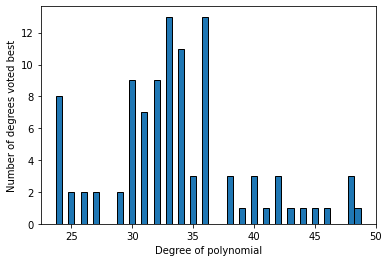

In [637]:
#plot histogram with mse_val_boot
plt.hist(degree_count,bins=50, label = 'number of times a degere had lowest validation error', align = 'left',edgecolor='k')
plt.xlabel('Degree of polynomial')
plt.ylabel('Number of degrees voted best')

<div class='exercise-r'>  
 
**5.2** [3 pts] What are your observations?
 
 - Why do you see so much variance in the `best_degree` over the bootstraps?
 - What will you choose as your `best_degree` for the test set?
 
 </div>

34 was my best degree, since we are looking at such high degree models, the variation between their mean squared error is quite small. Thus as we take various samples, the model accuracy can spread over a range that producess fairly similar lines. 

something is clearly wrong here. The degree is definitely too large and I just got a worse answer than before.See problem 5.3 seems like my best degree should be a lower degree and that I am overfitting. 


<div class='exercise-r'>  
 
**5.3** [5 pts] Fitting the best model on the test data.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Print the MSE of the model on the test data, and save it in `best_mse_dict`
 - Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
 - Print the coefficients of the model
 
 
 </div>

In [641]:
# your code here
x_train = df_train[['Spreading_factor']]
x_test = df_test[['Spreading_factor']]

y_train = df_train['Perc_population']
y_test = df_test['Perc_population']

In [642]:
# Select the best degree from the above exercise

# your code here

d = 34


In [643]:
#Compute the polynomial features
# your code here
x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree=d).fit_transform(x_test)

linreg = LinearRegression() 
linreg.fit(x_poly_train, y_train)

y_pred = linreg.predict(x_poly_test)

In [644]:
# your code here
MSE = mean_squared_error(y_pred, y_test)
print(MSE)


2.860931308607866


In [645]:
# your code here
best_mse_dict["5.3"] = MSE

In [646]:
# your code here
linreg.coef_

array([ 2.01884414e+02,  7.30311132e+00, -3.63959242e+01, -2.63812731e+02,
        8.13176481e+02,  4.00249592e+03, -7.17212191e+03, -2.80325148e+04,
        3.27721283e+04,  1.12233719e+05, -8.89456837e+04, -2.86500833e+05,
        1.54635236e+05,  4.97203382e+05, -1.78854068e+05, -6.10855804e+05,
        1.38228238e+05,  5.45131872e+05, -6.77964604e+04, -3.58679356e+05,
        1.60115053e+04,  1.75019240e+05,  3.31763012e+03, -6.31325741e+04,
       -4.45182306e+03,  1.66035700e+04,  1.87444666e+03, -3.09316196e+03,
       -4.58215673e+02,  3.86572782e+02,  6.87131331e+01, -2.90605841e+01,
       -5.89503759e+00,  9.92985479e-01,  2.22735048e-01])

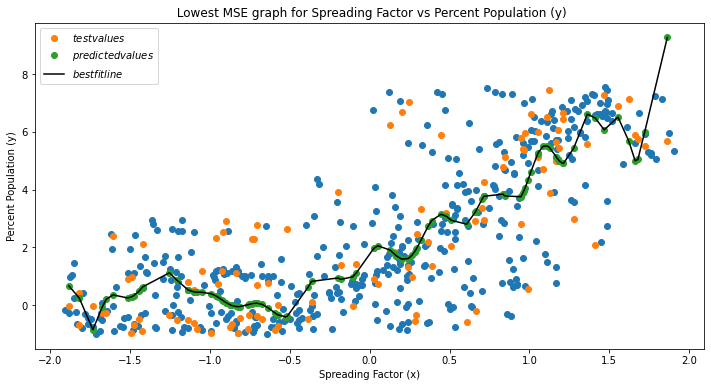

In [647]:
test_df = pd.DataFrame()

test_df["x_test_values"] =  x_test['Spreading_factor'].values
test_df["y_test_values"] = y_pred


test_df_sort = test_df.sort_values(by='x_test_values')


spread = df['Spreading_factor']


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(spread,perp,'o')
#sort_spread = spread.sort()
ax.plot(x_test , y_test, 'o', label=r'$test values$')
ax.plot(x_test , y_pred, 'o', label=r'$predicted values$')
ax.plot(test_df_sort['x_test_values'] , test_df_sort['y_test_values'], 'k-', label=r'$best fit line$')

ax.set_title(' Lowest MSE graph for Spreading Factor vs Percent Population (y)')
ax.set_xlabel('Spreading Factor (x)')
ax.set_ylabel('Percent Population (y)')
ax.legend();

*Your answer here*
Not sure what happened with my last value, but other than that value, things look a bit more fitted than my previous model. Data points and predictions are highly fitted. 

<div class='exercise'><b> Question 6:   Improving model consistency [30 points total]</b>

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. In this section $n=30$, and our **best model** can be chosen from any possible combination of the **30** degrees chosen.

For eg. a model with degrees `1,2,4,6`

The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularization which *switches off* highly unstable degree coefficients and gives us the most efficient solution.

**6.1** [10 pts] Find the best hyper-parameter `alpha`

First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.

**NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$

#### Instructions
- Read the train csv file.
- Assign the predictor and response variables appropriately
- Select the max degree of the polynomial, and make a list of `alpha` values
- For each value of `alpha`:
    - Compute the polynomial features for the data.
    - Create a `Lasso` regularization model with the value of `alpha`
    - Perform k-fold cross validation with k=10 using `Lasso` as model.
    - Compute and print the $MSE$ of the train and validation data and store in separate lists. 
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
- Store the previously selected values as `best_alpha` & print it.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.2** [10 pts] Find the most significant degrees.

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:

For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.

As before, we use the `bacteria_train.csv` for cross validation.

NOTE: You are free to experiment with the number of bootstraps.

**Instructions**
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
- For each bootstrap:
    - Take a sample the dataframe with `frac=1`
    - Train a **Lasso** model with the `best_alpha` computed above.
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
    - For each significant degree, update the count of that degree in `significant_degrees` 
- Plot the count of degrees for each bootstrap as a bar plot.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.3** [5 pts] Compute and print the MSE on the test set

Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$

#### Instructions

- Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
- Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
- Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
- Save the test $MSE$ to `best_mse_dict`.

**6.4** [5 pts] What are your observations?

- Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
- Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**6.1** [10 pts] Find the best hyper-parameter `alpha`
 
 First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
 
 **NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
 
 #### Instructions
 - Read the train csv file.
 - Assign the predictor and response variables appropriately
 - Select the max degree of the polynomial, and make a list of `alpha` values
 - For each value of `alpha`:
 - Compute the polynomial features for the data.
 - Create a `Lasso` regularization model with the value of `alpha`
 - Perform k-fold cross validation with k=10 using `Lasso` as model.
 - Compute and print the $MSE$ of the train and validation data and store in separate lists.
 - Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
 - Store the previously selected values as `best_alpha` & print it.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [648]:
# Train data
# your code here
filename = "data/bacteria_train.csv"
df_train = pd.read_csv(filename)

x_train, x_val = train_test_split(df_train[['Spreading_factor']], train_size = .8, random_state = 44)
y_train, y_val = train_test_split(df_train['Perc_population'], train_size = .8, random_state = 44)

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20]

cross_val_error_train = []
cross_val_error_val = []

degree_max = 24

mse_train = []
mse_val = []

#polynomialfeatures
x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
x_poly_val  = PolynomialFeatures(degree=d).fit_transform(x_val)

for a in alpha:
    print(a)
    #lasso regression
    lasso_reg = Lasso(alpha = a, max_iter = 1000).fit(x_poly_train, y_train)

    #_pred_train = lasso_reg.predict(x_poly_train)
    #y_pred_val = lasso_reg.predict(x_poly_val)

    #cv using k-folds and lasso regression model and get mse
    cross_val = cross_validate(lasso_reg, x_poly_train, y_train, scoring='neg_mean_squared_error', cv = 10, return_train_score = True)
    #cross_val_error_train.append(abs(np.mean(cross_val_mse_train['train_score'])))
    #cross_val_error_val.append(-
    mse_train.append(-cross_val['train_score'].mean())
    mse_val.append(-cross_val['test_score'].mean())
        

#mse for the train and validation
print(min(mse_val))


1e-05
0.0001


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414.2167967574844, tolerance: 0.21842717229349115
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.02165134038364, tolerance: 0.19952388815493421
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.1663050975062, tolerance: 0.20076678435493422
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_m

0.001
0.01


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.89144970438764, tolerance: 0.1991633575881579
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.6982869444771, tolerance: 0.19262545255263158
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383.5302152264138, tolerance: 0.19948080341973684
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mo

0.05


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.6671019583625, tolerance: 0.1963700935631579
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423.5717350768982, tolerance: 0.1991633575881579
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.4306187346732, tolerance: 0.19262545255263158
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mode

0.1
0.5


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.5530889134628, tolerance: 0.1963700935631579
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.7565908611598, tolerance: 0.1991633575881579
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.64658195689697, tolerance: 0.19262545255263158
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mod

1
2
5


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715.0378043621255, tolerance: 0.19812477109177634
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706.3365957266345, tolerance: 0.19212063150622952
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745.104140318254, tolerance: 0.19333929541508196
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mod

10
20
2.5359670767827005


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886.6007605222682, tolerance: 0.21842717229349115
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.7915267558503, tolerance: 0.19952388815493421
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802.5201251897388, tolerance: 0.20076678435493422
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mo

In [649]:
# Bootstrap first & then find the best regularization coefficient
# your code here
best_alpha = 0.01

<div class='exercise-r'>  
 
**6.2** [10 pts] Find the most significant degrees.
 
 From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:
 
 For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.
 
 As before, we use the `bacteria_train.csv` for cross validation.
 
 NOTE: You are free to experiment with the number of bootstraps.
 
 **Instructions**
 - Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
 - For each bootstrap:
 - Take a sample the dataframe with `frac=1`
 - Train a **Lasso** model with the `best_alpha` computed above.
 - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
 - For each significant degree, update the count of that degree in `significant_degrees`
 - Plot the count of degrees for each bootstrap as a bar plot.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [650]:
# your code here
significant_degrees = {}
d = 24
bootstrap = []
numboot = 200
best_alpha = 0.01

for i in range(numboot):
    
    df_train_new = df_train.sample(frac=1, replace=True)
    x_train_boot = df_train_new[['Spreading_factor']]
    y_train_boot = df_train_new['Perc_population']
    
    #split the data 
    x_train, x_val, y_train, y_val = train_test_split(x_train_boot, y_train_boot, train_size = 0.8)
   
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val  = PolynomialFeatures(degree=d).fit_transform(x_val)

    lasso_reg = Lasso(alpha = best_alpha, max_iter = 1000).fit(x_poly_train, y_train)

    lasso_coef = lasso_reg.coef_
   
    counter = 0
    
    for degree in lasso_coef:
        if(degree > 0.1):
            counter_str = counter
            if counter in significant_degrees:
                significant_degrees[counter] = 1 + significant_degrees[counter]
            else:
                significant_degrees[counter] = 1
                
        counter = counter+1

            #print(lasso_coef.index(degree))



/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.90658390219505, tolerance: 0.225475516060355
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444.01549463800455, tolerance: 0.22083422477781064
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.26014652868264, tolerance: 0.20528287375887577
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_m

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.47800084441934, tolerance: 0.22112350534349112
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.85578009052955, tolerance: 0.22326982929733724
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453.8277848402359, tolerance: 0.22959228511627222
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.6553877324349, tolerance: 0.2044889437991124
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.65939138485373, tolerance: 0.2236262524547337
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.9620318498676, tolerance: 0.2172389594689349
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mode

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.0611912857844, tolerance: 0.19860622565
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376.3474906659818, tolerance: 0.21953919455887572
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.83306115247456, tolerance: 0.20435164185
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordi

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.6564733797112, tolerance: 0.235596461104142
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.6703467380235, tolerance: 0.21810020018964502
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.1411846540425, tolerance: 0.2177315578795858
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.6222853756297, tolerance: 0.20406084940000002
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.24157742726857, tolerance: 0.21164516420029586
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.78695829429444, tolerance: 0.224534233466568
  positive)
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/sklearn/linear_mo

{1: 200, 4: 199, 2: 105, 7: 24, 6: 7, 3: 6, 5: 3}

Text(0.5, 1.0, 'occurences of significant degrees')

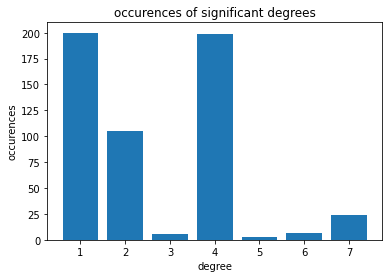

In [651]:
# your code here

display(significant_degrees)

keys = significant_degrees.keys()
values = significant_degrees.values()
plt.bar(keys, values)
plt.xlabel('degree')
plt.ylabel('occurences')
plt.title('occurences of significant degrees')

In [652]:
d

24

<div class='exercise-r'>  
 
**6.3** [5 pts] Compute and print the MSE on the test set
 
 Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$
 
 #### Instructions
 
 - Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
 - Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
 - Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
 - Save the test $MSE$ to `best_mse_dict`.
 
 </div>

In [653]:
# your code here
d = 7
x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']

x_poly_test = PolynomialFeatures(degree=d).fit_transform(x_test)

lasso_reg = Lasso(alpha = best_alpha, max_iter = 1000).fit(x_poly_test, y_test)



y_pred = lasso_reg.predict(x_poly_test)

mse = mean_squared_error(y_pred,y_test)

   

In [654]:
# your code here
counter = 0
for degree in lasso_reg.coef_:
    if degree > 0.1:
        print(counter)
    counter = counter + 1
print(lasso_reg.coef_)

1
2
4
[ 0.          2.15602543  0.68473931  0.          0.15275623 -0.
 -0.07747573 -0.01639803]


In [655]:
# your code here
best_mse_dict['6.3'] = mse

<div class='exercise-r'>  
 
**6.4** [5 pts] What are your observations?
 
 - Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
 - Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
 - Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
 - Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
 
 
 </div>

In [656]:
display(best_mse_dict)

{'2.1': 2.6519056545149615,
 '3.2': 2.490621553056282,
 '4.2': 2.699129073060968,
 '5.3': 2.860931308607866,
 '6.3': 2.546435770273017}

*Your answer here*

<div class='exercise'><b> Question 7:   Analyze your best test MSEs for each sub section of the homework [10 points total]</b></div>

**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe. 

- Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested? 

### Your Answers

<div class='exercise-r'>  
 
**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe.
 
 - Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.
 
 </div>

In [657]:
# your code here
best_mse_df = pd.DataFrame.from_dict(best_mse_dict, orient = 'index')
best_mse_df.columns = ['MSE']
display(best_mse_df)

,MSE
2.1,2.651906
3.2,2.490622
4.2,2.699129
5.3,2.860931
6.3,2.546436


Text(0.5, 1.0, 'MSE for different methods')

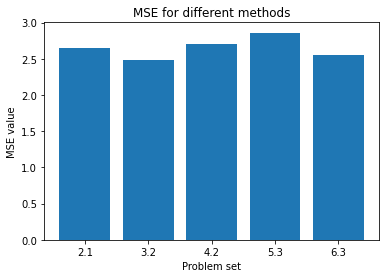

In [658]:
# your code here
keys = best_mse_dict.keys()
values = best_mse_dict.values()
plt.bar(keys, values)
plt.xlabel('Problem set')
plt.ylabel('MSE value')
plt.title('MSE for different methods')

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested?

*Your answer here*

I think our final model is likely the best. While I got a better result in 3.2, the number of degrees that I used was somewhat large (16). However, I was able to get a very similar MSE for the last one without using nearly as many polynomial coeficients. I have to imagine this would be helpful if we were training over a much larger data set. 

#### THE END